In [2]:
!mkdir /content/data
!mkdir /content/data/dataset

In [3]:
!unzip "/content/Medicare-Fraud-Detection-DS.zip" -d /content/data/dataset

Archive:  /content/Medicare-Fraud-Detection-DS.zip
  inflating: /content/data/dataset/Test-1542969243754.csv  
  inflating: /content/data/dataset/Test_Beneficiarydata-1542969243754.csv  
  inflating: /content/data/dataset/Test_Inpatientdata-1542969243754.csv  
  inflating: /content/data/dataset/Test_Outpatientdata-1542969243754.csv  
  inflating: /content/data/dataset/Train-1542865627584.csv  
  inflating: /content/data/dataset/Train_Beneficiarydata-1542865627584.csv  
  inflating: /content/data/dataset/Train_Inpatientdata-1542865627584.csv  
  inflating: /content/data/dataset/Train_Outpatientdata-1542865627584.csv  


<h1>Medicare Fraud Detection</h1>
<p>The purpose of this notebook is to perform exploratory data analysis, data preprocessing, feature selection, feature engineering, model training and evaluation for fraud detection using the Medicare Fraud Detection dataset</p>

## Problem Statement

<p><ul><li>USA offers a government backed health insurance program typically for aged individuals to cover their medical bills for hospital visits and treatment.</li>
<li>It has been found that doctors, providers, beneficiaries and associates are involved in unfair practices to augment the claim amount for their benefit. For example, doctors submit claim forms with more sophisticated tests/diagnosis/procedures than was actually performed or using fake patient data so as to receive more insurance payment than rightfully due.
<li>Due to these practices, the insurance providers suffer heavy losses every year which impacts the smooth running of their business. Hence they increase premium payments which makes affordable health care accessible to only the elite few.</li>
<li>Given the dataset with information regarding beneficiaries, inpatients and outpatients, our target is to build a suitable model which can predict how likely a healthcare provider is to perform health insurance fraud
</ul></p>

## Dataset Description

<p>The following is a description of the available attributes of the entities in the dataset. </br>
Note that I did not find any data schema definition so the following is as per my understanding. I spent a lot of time understanding each and every column since understanding the data and the context is the most important step in any data science project. The context here is how US Medicare system and insurance claim filing works and what are the ways this system is exploited.</p>
<h3>Dataset source : <a href="https://data.world/gymprathap/medicare-fraud-detection-dataset">Medicare Fraud Detection Dataset from data.world</a>
<h3>
<ul><li>Provider - Provider ID</li>
<li>PotentialFraud - Yes if provider is possibly fradulent else No</li>
<li> BeneID - Beneficiary ID </li>
<li>DOB	- Date of Birth</li>
<li>DOD	- Date of Death</li>
<li>Gender, Race, State, County - Self explanatory</li>
<li>ChronicCond_Heartfailure, ChronicCond_Alzheimer, ChronicCond_KidneyDisease, ChronicCond_Cancer, ChronicCond_ObstrPulmonary, ChronicCond_Depression, ChronicCond_Diabetes, ChronicCond_IschemicHeart, ChronicCond_Osteoporasis, ChronicCond_rheumatoidarthritis, ChronicCond_stroke
- Binary field of 1/2 to specify if BeneID had these chronic conditions or not
<l1>RenalDiseaseIndicator - 0 if BeneID has no indication of renal diseases else Y </li>
<li>NoOfMonths_PartACov - Medicare system has 4 types of coverage Part A, B, C and D, where under Part A inpatient visits, treatment and nurses is covered. Elgibility for Part A - 65 years minimum, 10 years of full time work</li>
<li>NoOfMonths_PartBCov - Part B covers hospitalization ( admitted to hospital overnight )</li>
<li>IPAnnualReimbursementAmt - amount Medicare will pay for inpatient visits</li>
<li>IPAnnualDeductibleAmt - amount person must pay to Medicare to get the facility of IP annual reimbursement</li>
<li>OPAnnualReimbursementAmt - amount Medicare will pay for outpatient visits</li>
<li>OPAnnualDeductibleAmt - amount person must pay to get annual outpatient reimburesement</li>
<li>ClaimID, ClaimStartDt, ClaimEndDt, Provider - self explanatory</li>
<li>InscClaimAmtReimbursed - how much Medicare paid</li>
<li>AttendingPhysician, OperatingPhysician, OtherPhysician - IDs of the respective physicians</li>
<li>AdmissionDt - Date of admission</li>
<li>ClmAdmitDiagnosisCode - What was the diagnosis code assigned when patient was admitted ?</li>
<li>DeductibleAmtPaid - amount person actually paid as opposed to the previous attributed OPAnnualDeductibleAmt which is how much he was supposed to pay</li>
<li>DischargeDt - date of discharge for outpatients</li>
<li>DiagnosisGroupCode - used to categorize inpatient visits</li>
<li>ClmDiagnosisCode_1 to ClmDiagnosisCode_10 - There is an official categorization of diseases called ICD or International Classification of Diseases. Diagnosis Code 1 is the most important diagnosis specifying which is the major dieases, subsequent codes are for subsequent diagnoses. Based on the codes given it looks like it is using ICD 9. This is most important attribute as this specifies the disease in terms of medical coding and any mistake here will lead to rejection of the claim form.
<li>ClmProcedureCode_1 to ClmProcedureCode_6 - Codes for the procedure which was allegedly performed given the diagnosis code</li>






In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

## Exploratory Data Analysis - Creating a consolidated dataset

<p>There are 4 CSVs provided containing beneficiary details, inpatient, outpatient and which providers are fradulent. First step, combine dataframe with target variable ( is fraudlent or not ) with the inpatient and outpatient dataframes

In [ ]:
os.mkdir("/content/data/dataset")

In [ ]:
!unzip /content/Medicare-Fraud-Detection-DS.zip -d data/dataset

Archive:  /content/Medicare-Fraud-Detection-DS.zip
  inflating: data/dataset/Test-1542969243754.csv  
  inflating: data/dataset/Test_Beneficiarydata-1542969243754.csv  
  inflating: data/dataset/Test_Inpatientdata-1542969243754.csv  
  inflating: data/dataset/Test_Outpatientdata-1542969243754.csv  
  inflating: data/dataset/Train-1542865627584.csv  
  inflating: data/dataset/Train_Beneficiarydata-1542865627584.csv  
  inflating: data/dataset/Train_Inpatientdata-1542865627584.csv  
  inflating: data/dataset/Train_Outpatientdata-1542865627584.csv  


In [5]:
target_variable_df = pd.read_csv("/content/data/dataset/Train-1542865627584.csv")
inpatient_df = pd.read_csv("/content/data/dataset/Train_Inpatientdata-1542865627584.csv")
outpatient_df = pd.read_csv("/content/data/dataset/Train_Outpatientdata-1542865627584.csv")
beneficiary_df = pd.read_csv("/content/data/dataset/Train_Beneficiarydata-1542865627584.csv")


<p>Natural join between target df and inpatient df to get output df where each row tells us provider ID, is provider fraudulent or not and the inpatient details. Left join between the output df obtained and beneficiary df gives final output df with all patient + provider details.<br/>Same process is repeated for target and outpatient df. Consolidated dataset is created concatenating these 2 output dfs with additional column patient_type to differentiate between inpatients and outpatients</p>

In [6]:
def create_consolidated_dataset(target_variable_df, inpatient_df, outpatient_df, beneficiary_df):
        target_inpatient_df = pd.merge(target_variable_df, inpatient_df,on='Provider')
        target_inpatient_beneficiary_df = pd.merge(target_inpatient_df, beneficiary_df,on='BeneID')

        target_outpatient_df = pd.merge(target_variable_df, outpatient_df, on='Provider')
        target_outpatient_beneficiary_df = pd.merge(target_outpatient_df, beneficiary_df, on='BeneID')

        target_inpatient_beneficiary_df['patient_type']=['inpatient']*len(target_inpatient_beneficiary_df)
        target_outpatient_beneficiary_df['patient_type']=['outpatient']*len(target_outpatient_beneficiary_df)

        dataset = pd.concat([target_inpatient_beneficiary_df, target_outpatient_beneficiary_df])
        return dataset

dataset = create_consolidated_dataset(target_variable_df, inpatient_df, outpatient_df, beneficiary_df)

## Exploratory Data Analysis - Missing value analysis

In [7]:
missing = dataset.isnull().sum().reset_index().rename(columns={'index':'Attribute',0:'Missing_Count'})
missing['Missing_Percentage']=missing['Missing_Count']/dataset.shape[0]
missing

,Attribute,Missing_Count,Missing_Percentage
0,Provider,0,0.000000
1,PotentialFraud,0,0.000000
2,BeneID,0,0.000000
3,ClaimID,0,0.000000
4,ClaimStartDt,0,0.000000
5,ClaimEndDt,0,0.000000
6,InscClaimAmtReimbursed,0,0.000000
7,AttendingPhysician,1508,0.002701
8,OperatingPhysician,443764,0.794975
9,OtherPhysician,358475,0.642185


<p>From column wise NA checking, we confirm that we don't have missing values in attributes important to us - <ul><li>Provider</li>
<li>PotentialFraud</li>
<li>BeneID</li>
<li>ClaimID</li>
<li>ClaimStartDt</li>
<li>ClaimEndDt</li>
<li>InscClaimAmtReimburder</li></ul></p>


In [8]:
missing[missing['Missing_Percentage']>0.7]

,Attribute,Missing_Count,Missing_Percentage
8,OperatingPhysician,443764,0.794975
10,AdmissionDt,517737,0.927493
11,ClmAdmitDiagnosisCode,412312,0.738631
13,DischargeDt,517737,0.927493
14,DiagnosisGroupCode,517737,0.927493
18,ClmDiagnosisCode_4,393675,0.705244
19,ClmDiagnosisCode_5,446287,0.799495
20,ClmDiagnosisCode_6,473819,0.848817
21,ClmDiagnosisCode_7,492034,0.881448
22,ClmDiagnosisCode_8,504767,0.904258


<br/><p>These columns have too many missing values ( >70% empty )  and it is best to drop these columns as majority is missing values so imputing techniques will not be accurate</p>  
<ul>
<li>AdmissionDt</li>
<li>DischargeDt</li>
<li>DiagnosisGroupCode</li>
<li>ClmDiagnosisCode_8</li>
<li>ClmDiagnosisCode_9</li>
<li>ClmDiagnosisCode_10</li>
<li>ClmProcedureCode_1</li>
<li>ClmProcedureCode_2</li>
<li>ClmProcedureCode_3</li>
<li>ClmProcedureCode_4</li>
<li>ClmProcedureCode_5</li>
<li>ClmProcedureCode_6</li>
<li>DOD</li>
</li>
</ul>

In [9]:
dataset = dataset.drop(columns=missing[missing['Missing_Percentage']>0.7]['Attribute'].unique())

<p>Let's see how many attributes remain with missing values</p>

In [10]:
dataset.isnull().sum()

Provider                                0
PotentialFraud                          0
BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OtherPhysician                     358475
DeductibleAmtPaid                     899
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
DOB                                     0
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease         

<p>
<ul><li>Claim Diagnosis code 1 is very important this is the first diagnosis recorded by health care professional with maximum weightage in claim filing. This is a categorical column and best way to handle missing is to drop rows with this value missing</li>
<li>Deductible Amount Paid is also important for claim filing so we will handle missing values by using forward interpolation since % missing is just 0.0016%</li>
<li>Attending physician, other physician don't really mean much till we have some tangible info about them so we can ignore it</li>
<li>Diagnosis Code 2 and 3 missing is fine so long as Code 1 is present which we ensure by point 1 </li>

In [11]:
dataset = dataset[dataset['ClmDiagnosisCode_1'].notna()]
dataset['DeductibleAmtPaid'] = dataset['DeductibleAmtPaid'].interpolate(method='linear')

<ipython-input-11-e30747583a9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['DeductibleAmtPaid'] = dataset['DeductibleAmtPaid'].interpolate(method='linear')


In [12]:
dataset.isnull().sum()

Provider                                0
PotentialFraud                          0
BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1471
OtherPhysician                     351731
DeductibleAmtPaid                       0
ClmDiagnosisCode_1                      0
ClmDiagnosisCode_2                 185153
ClmDiagnosisCode_3                 304703
DOB                                     0
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease         

## Exploratory Data Analysis - Data Visualization

<p>The goal of this section is to look at the data, perform feature selection/feature creation suitable to build a classifier with 2 classes, class 0 will be predicted if for a given provider and patient information the claim filed is not fraudulent, else class 1 will be predicted

In [13]:
def draw_pie_chart(labels, sizes):
    plt.figure(figsize=(3,3))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.show()

def draw_bargraph(data, labels, xlabel, ylabel, title, chart_type='normal',f_x=10,f_y=10):
    plt.figure(figsize=(f_x,f_y))
    if chart_type == 'horizontal':
        plt.barh(labels, data, color='skyblue')
    else:
        plt.bar(data, labels, color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def draw_histogram(data, xlabel, ylabel, title, f_x=5,f_y=5):
    plt.figure(figsize=(f_x,f_y))
    plt.hist(data, bins=25,color='green',edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def draw_kde_plot(data, xlabel,ylabel,title):
    sns.kdeplot(data,color='green',fill=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

<h2>Distribution of values in target variable</h2>

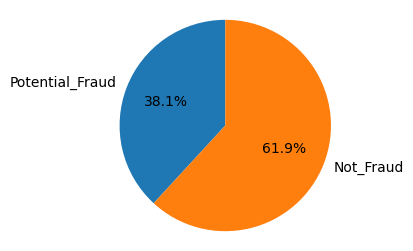

In [14]:
draw_pie_chart(['Potential_Fraud','Not_Fraud'], [dataset[dataset['PotentialFraud']=='Yes'].shape[0], dataset[dataset['PotentialFraud']=='No'].shape[0]] )

<p><ul><li>The dataset is skewed to the situation where provider is not doing any fraud, meaning there will be far more samples to learn this class compared to the other class. So we should use weighted cross entropy loss instead of cross entropy loss during classification model building so that incorrects in predicting the majority class is penalized heavily and the tendency of model to mode collapse on majority class is reduced.</li>
<li>For this classification problem, a suitable evaluation metric will be weighted macro F1 score - macro F1 beacuse we want to ensure model is performing well for each class and weighted because dataset is not balance</li>

<h2>Distribution of age of patients at the time of claim</h2>

<p>We add 1 new attributed called age, which is the age of the person at the time the claim was filed</p>

In [15]:
def calculate_age(birthdate, claimdate):
        birthdate = datetime.strptime(birthdate, '%Y-%m-%d')
        enddate = datetime.strptime(claimdate, '%Y-%m-%d')
        age = enddate.year - birthdate.year - ((enddate.month, enddate.day) < (birthdate.month, birthdate.day))
        return age

dataset['age'] = dataset.apply(lambda x:calculate_age(x['DOB'],x['ClaimEndDt']), axis=1)

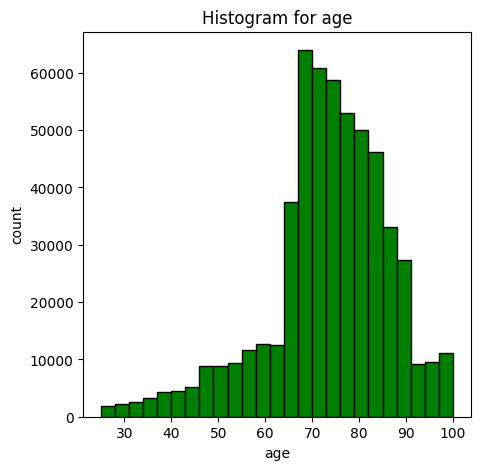

In [16]:
draw_histogram(dataset['age'].values, 'age','count','Histogram for age')

<p>The age of patients is centered around 70-80 range but there are quite a few patients in age range less than 65. Typically patients above 65 are eligible for Medicare benefits. Let's see the percentage of fraud in the age range <65</p>

In [17]:
dataset[dataset['age']<65]['PotentialFraud'].value_counts()

No     57366
Yes    34434
Name: PotentialFraud, dtype: int64

<p>Around 60% of the patients in age range <65 have been involved in claim fraud. When we build the model, age at which claim was filed will definitely be a feature. </p>

<h2> Distribution of fraudulent claims with given chronic diseases </h2>

<p>Since metadata is not present in dataset, I assume that chronic_condition = 1 means the condition is not there and chronic_condition = 2 means the patient has that condition</p>

In [18]:
labels = [ each for each in dataset.columns if "ChronicCond" in each ]
fraud_1_labels = [each+'_1_Fraud' for each in labels]
fraud_2_labels = [each+'_2_Fraud' for each in labels]
data_1_fraud = [ dataset[(dataset[each]==1)&(dataset['PotentialFraud']=='Yes')]['ClaimID'].nunique() for each in labels ]
data_2_fraud = [ dataset[(dataset[each]==2)&(dataset['PotentialFraud']=='No')]['ClaimID'].nunique() for each in labels ]

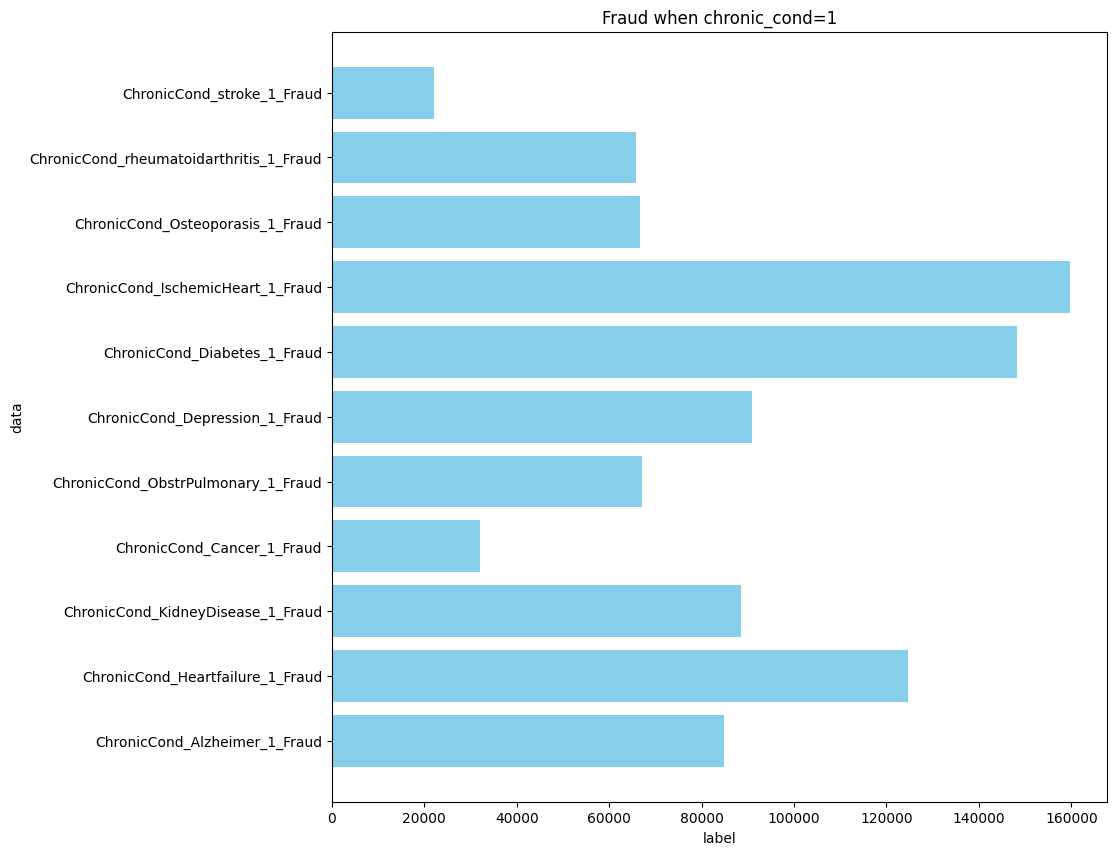

In [19]:
draw_bargraph(data_1_fraud, fraud_1_labels,'label','data','Fraud when chronic_cond=1', chart_type='horizontal')

<p>Most of the frauds happening when chronic condition is supposedly absent is related to heart failure and diabetes whereas the frauds happening when chronic condition is present involves majorly stroke, cancer and pulmonary obstruction </p>

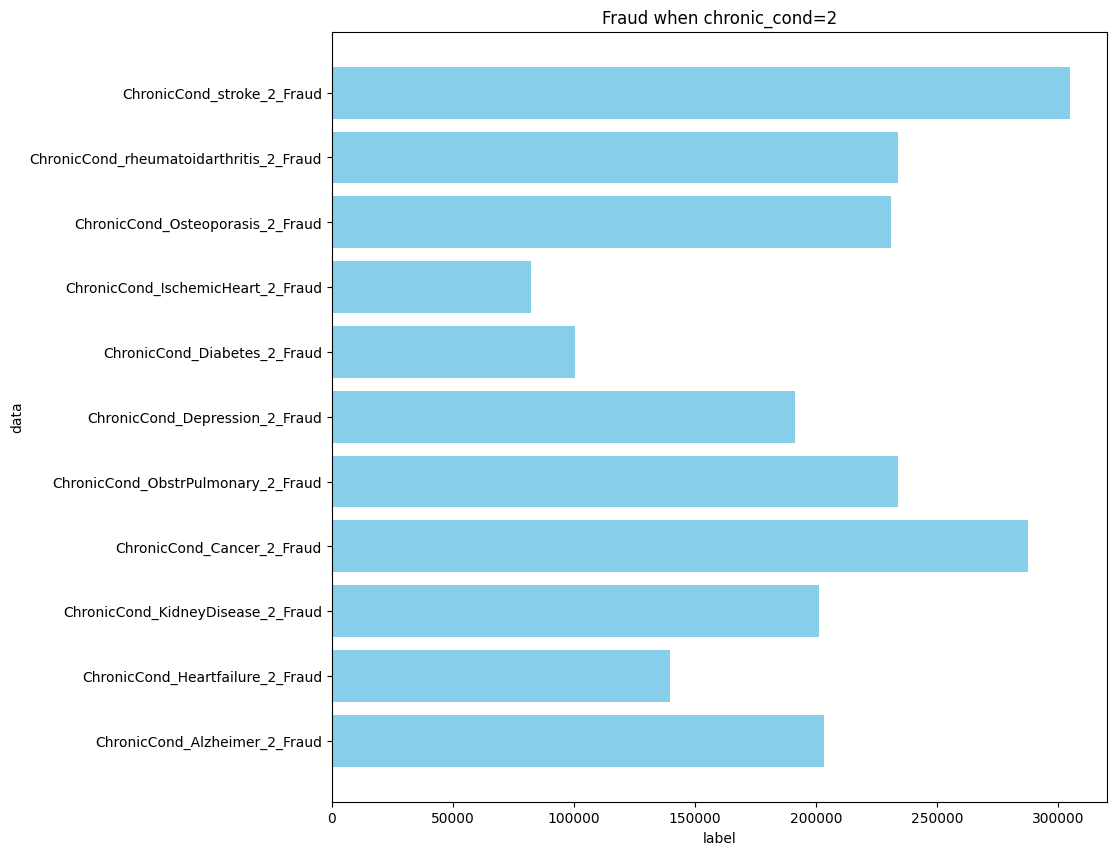

In [20]:
draw_bargraph(data_2_fraud, fraud_2_labels,'label','data','Fraud when chronic_cond=2', chart_type='horizontal')

<h2>Distrbution of claim diagnosis codes</h2>

In [21]:
dataset.columns

Index(['Provider', 'PotentialFraud', 'BeneID', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OtherPhysician', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'DOB', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_type',
       'age'],
      dtype='object')

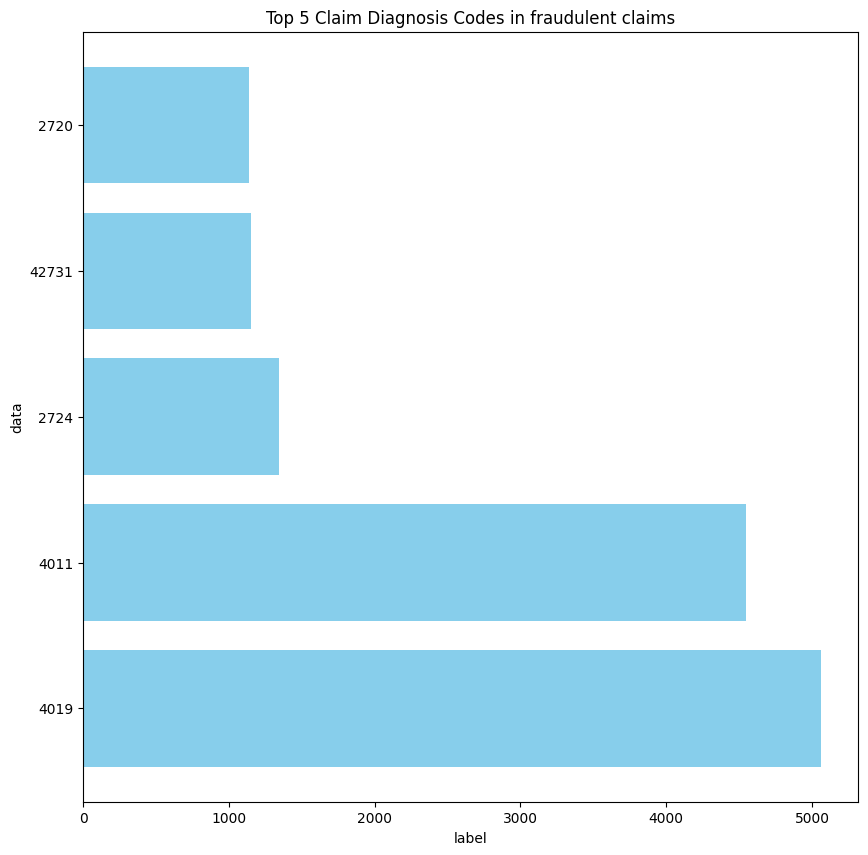

In [22]:
data = dataset[dataset['PotentialFraud']=='Yes']['ClmDiagnosisCode_1'].value_counts().head(5).reset_index()
sizes = data['ClmDiagnosisCode_1'].values
#draw_pie_chart(data['index'].values, sizes)
draw_bargraph(sizes, data['index'].values,'label','data','Top 5 Claim Diagnosis Codes in fraudulent claims',\
              chart_type='horizontal')

<ul><li>The top 5 diagnosis codes that come up in fraudulent claims are shown in the above bar graph</li>
<li>Out of these top 5, ICD code 401.9 has the highest count</li>
<li>This code is related to "hypertension without identfiable cause"</li>
<li>This is also consistent with the earlier finding that majority cases of fraud with existence of chronic diseases involve stroke and obstruction of pulmonary ( both are heart related )

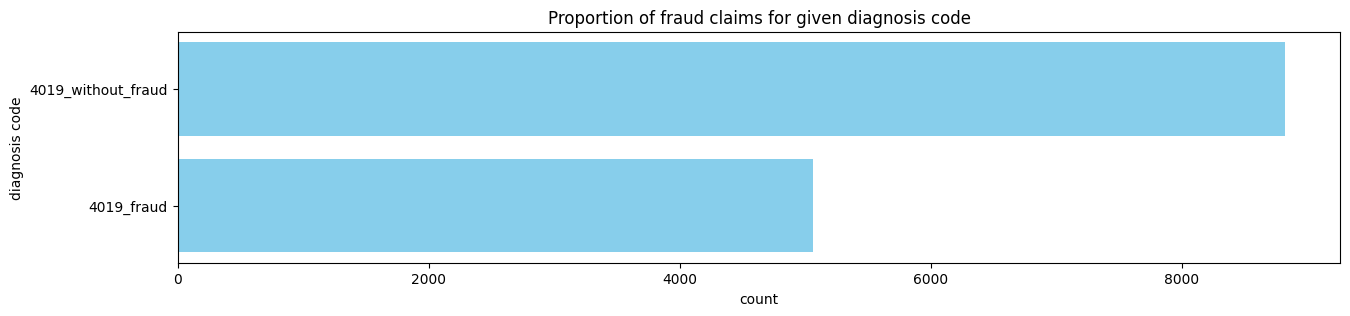

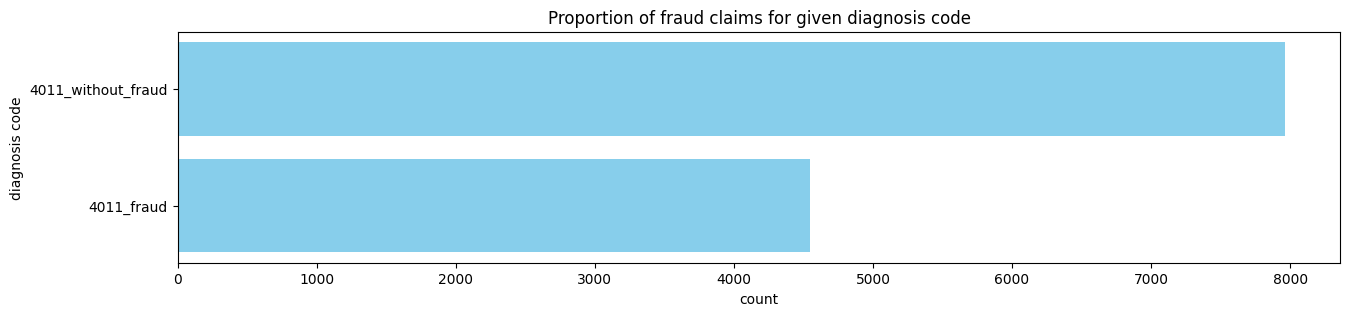

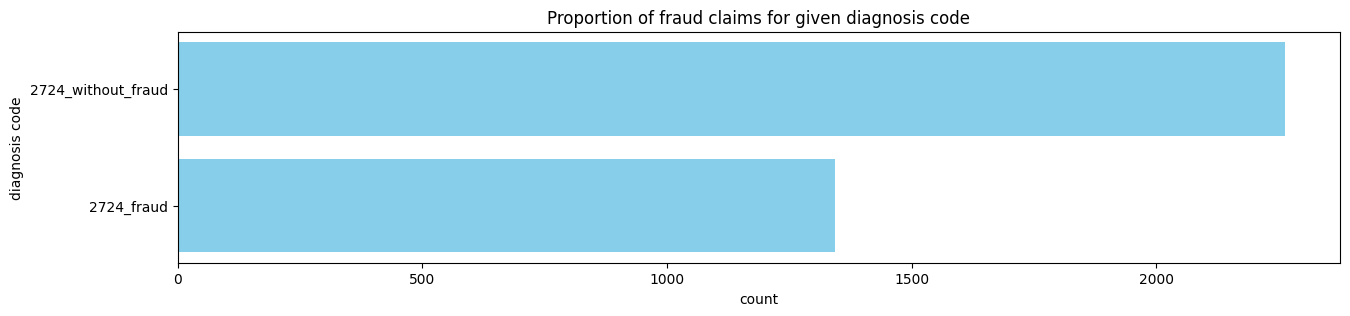

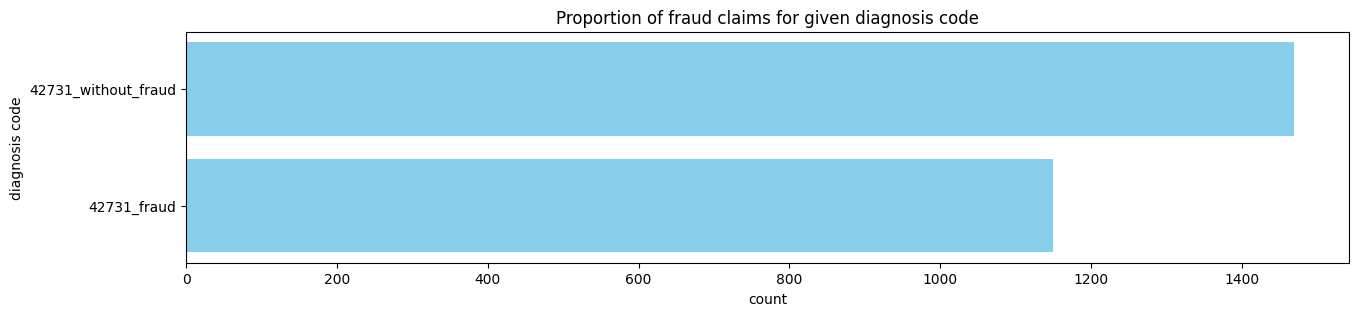

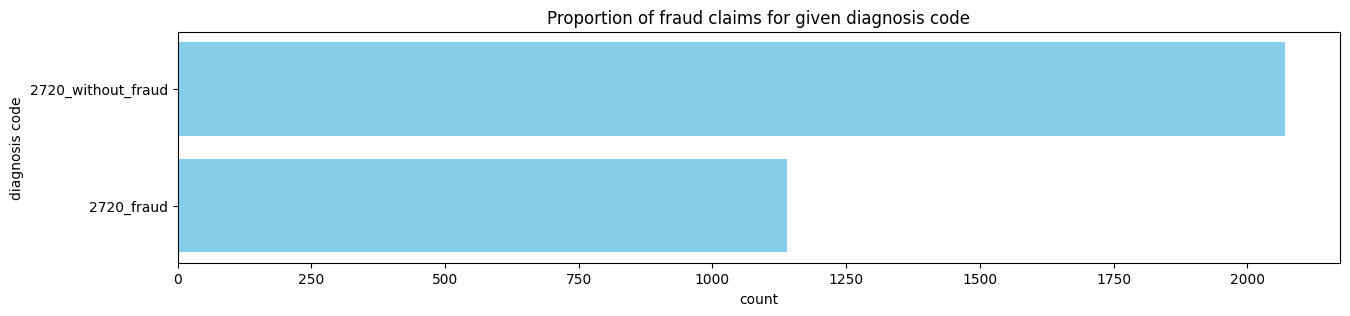

In [23]:
for each_code in data['index'].values:
        with_fraud = dataset[(dataset['PotentialFraud']=='Yes')&(dataset['ClmDiagnosisCode_1']==each_code)].shape[0]
        without_fraud = dataset[(dataset['PotentialFraud']=='No')&(dataset['ClmDiagnosisCode_1']==each_code)].shape[0]
        draw_bargraph([with_fraud, without_fraud], \
         ['{}_fraud'.format(each_code),'{}_without_fraud'.format(each_code)],'count','diagnosis code',\
                      'Proportion of fraud claims for given diagnosis code', chart_type='horizontal',f_x=15,f_y=3)


<h2>Distribution of gender, race, state and county</h2>

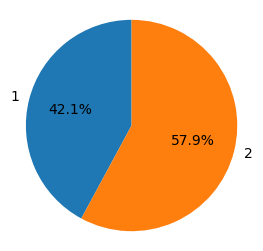

In [24]:
draw_pie_chart(['1','2'], \
               [dataset[dataset['Gender']==1].shape[0],dataset[dataset['Gender']==2].shape[0]] )

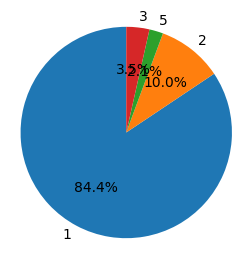

In [25]:
race_data = [dataset[dataset['Race']==each].shape[0] for each in dataset['Race'].unique()]
draw_pie_chart(dataset['Race'].unique(), race_data)

<h3>Top 5 states with fraud claims</h3>

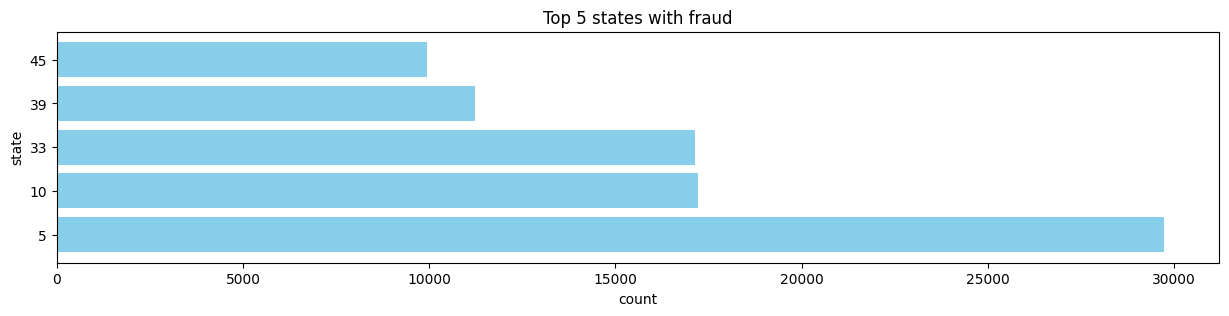

In [60]:
top_5_states = dataset[dataset['PotentialFraud']=='Yes']['State'].value_counts().head(5).reset_index()
top_5_states_labels = top_5_states['index'].values
top_5_states_labels = [str(x) for x in top_5_states_labels]
state_with_fraud = top_5_states['State'].values
draw_bargraph(state_with_fraud, top_5_states_labels,'count','state','Top 5 states with fraud',\
              chart_type='horizontal', f_x=15,f_y=3)

<h2>Top 5 county with fraud claims</h2>

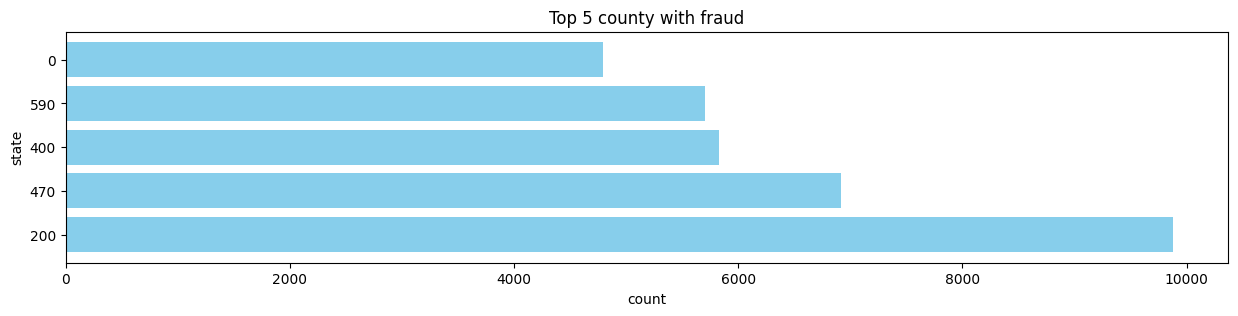

In [61]:
top_5_county = dataset[dataset['PotentialFraud']=='Yes']['County'].value_counts().head(5).reset_index()
top_5_county_labels = top_5_county['index'].values
top_5_county_labels = [str(x) for x in top_5_county_labels]
county_with_fraud = top_5_county['County'].values
draw_bargraph(county_with_fraud, top_5_county_labels,'count','state','Top 5 county with fraud',\
              chart_type='horizontal', f_x=15,f_y=3)

County 4797 has no fraud claims

## Feature engineering and feature selection

In [ ]:
dataset.columns

Index(['Provider', 'PotentialFraud', 'BeneID', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OtherPhysician', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'DOB', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'patient_type',
       'age'],
      dtype='object')

<p>These are the features we will take directly from the dataset
<ul>
<li>InscClaimAmtReimbursed</li>
<li>DeductibleAmtPaid</li>
<li>RenalDieaseIndicator</li>
<li>ChroniCond_*</li>
</ul>
</p>
<p> These are the features we will create
<ul>
<li>Age of patient at claim time ( already added in previous steps )</li>
<li>patient_type_flag 1 for in 0 for out </li>
<li>gender_flag 1 for gender 1 and 0 for gender 2</li>
<li>race_is_1 or 2 or 3 or 5 for the race values present </li>
<li>is_state_in_top_5_fraud_states</li>
<li>is_county_in_top_5_fraud_county</li>
<li>is_claim_diagnosis_code_1_in_top_5_codes</li>


<h2>Assumptions</h2>
<ul>
<li>If a provider has PotentiallyFraud=Yes then every claim from that provider is considered as Fraud ( may not be the case )</li>
<li>Claims are likely fraud if age of person at time of claim is less than 65 years of age ( exceptions are possible but here ignored )
</ul>

In [107]:
import json
def generate_metadata(dataset):
        top_5_states = dataset[dataset['PotentialFraud']=='Yes']['State'].value_counts().head(5).reset_index()
        top_5_states = top_5_states["index"].values
        top_5_county = dataset[dataset['PotentialFraud']=='Yes']['County'].value_counts().head(5).reset_index()
        top_5_county = top_5_county["index"].values
        top_5_codes = dataset[dataset['PotentialFraud']=='Yes']['ClmDiagnosisCode_1'].value_counts().head(5).reset_index()
        top_5_codes = top_5_codes["index"].values
        with open("metadata.json","w") as fptr:
              fptr.write(json.dumps({"top_5_states":top_5_states.tolist(), \
                                     "top_5_county":top_5_county.tolist(), \
                                     "top_5_codes":top_5_codes.tolist()}))


def add_new_features(dataset):
        dataset['patient_type_flag'] = dataset['patient_type'].apply(lambda x:1 if x=='inpatient' else 0)
        dataset['gender_flag'] = dataset['Gender'].apply(lambda x:1 if x==1 else 0)
        with open("metadata.json","r") as fptr:
                metadata = json.loads(fptr.read())
        for each in dataset['Race'].unique():
              dataset['race_is_{}'.format(each)] = dataset['Race'].apply(lambda x:1 if x==each else 0)
        dataset['is_state_in_top_5_fraud_states'] = dataset['State'].apply(lambda x:1 if x in metadata["top_5_states"] else 0)
        dataset['is_county_in_top_5_fraud_county'] = dataset['County'].apply(lambda x:1 if x in metadata["top_5_county"] else 0)
        dataset['is_claim_diagnosis_code_1_in_top_5_codes'] = dataset['ClmDiagnosisCode_1'].apply(lambda x:1 if x in metadata["top_5_codes"] else 0)
        return dataset

def adjust_existing_features(dataset):
      for each in dataset.columns:
          if "ChronicCond_" in each:
                dataset[each+"_adjusted"] = dataset[each].apply(lambda x:x-1)
      dataset['PotentialFraud_adjusted'] = dataset['PotentialFraud'].apply(lambda x:1 if x.lower()=='yes' else 0)
      dataset['RenalDiseaseIndicator'] = dataset['RenalDiseaseIndicator'].apply(lambda x:1 if x.lower()=='y' else 0)
      return dataset

In [65]:
generate_metadata(dataset)

In [66]:
dataset_with_new_features = add_new_features(dataset)

In [108]:
dataset_with_new_features = adjust_existing_features(dataset_with_new_features)

## Model building and evaluation

In [205]:
X = dataset_with_new_features[['InscClaimAmtReimbursed','DeductibleAmtPaid','RenalDiseaseIndicator',\
        'age', 'patient_type_flag', 'gender_flag', 'race_is_1', 'race_is_2',\
         'race_is_5', 'race_is_3', 'is_state_in_top_5_fraud_states',\
         'is_county_in_top_5_fraud_county','is_claim_diagnosis_code_1_in_top_5_codes',\
         'ChronicCond_Alzheimer_adjusted', 'ChronicCond_Heartfailure_adjusted',\
         'ChronicCond_KidneyDisease_adjusted', 'ChronicCond_Cancer_adjusted',\
         'ChronicCond_ObstrPulmonary_adjusted',\
         'ChronicCond_Depression_adjusted', 'ChronicCond_Diabetes_adjusted',\
         'ChronicCond_IschemicHeart_adjusted','ChronicCond_Osteoporasis_adjusted',\
         'ChronicCond_rheumatoidarthritis_adjusted','ChronicCond_stroke_adjusted' ]]
Y = dataset_with_new_features[['PotentialFraud_adjusted']]

In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pickle

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

<h2>Calculating weights for weighted cross entropy loss </h2>

In [211]:
weights = {0:Y.shape[0]/Y[Y['PotentialFraud_adjusted']==0].shape[0],
           1:Y.shape[0]/Y[Y['PotentialFraud_adjusted']==1].shape[0]
           }

In [212]:
model = LogisticRegression(class_weight=weights)

<h2>Scaling the features and saving the scaler object for later use</h2>

In [208]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
with open("scaling_metadata.pkl","wb") as fptr:
        fptr.write(pickle.dumps(scaler))

In [213]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted Macro F1 Score: {weighted_f1}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Weighted Macro F1 Score: 0.5980803567723462


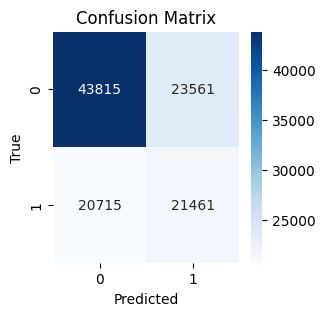

In [214]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [221]:
with open("model.pkl","wb") as fptr:
      fptr.write(pickle.dumps(model))

In [234]:
!python3 inference_script.py

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
[1 0 0 ... 1 1 1]
